In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("../data/urban/UrbanSound8K.csv")
data.shape

(8732, 8)

In [4]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [5]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

class   index  jackhammer  dog_bark  children_playing  street_music  \
0       fold1         120       100               100           100   
1       fold2         120       100               100           100   
2       fold3         120       100               100           100   
3       fold4         120       100               100           100   
4       fold5         120       100               100           100   
5       fold6          68       100               100           100   
6       fold7          76       100               100           100   
7       fold8          78       100               100           100   
8       fold9          82       100               100           100   
9      fold10          96       100               100           100   

class  air_conditioner  drilling  engine_idling  siren  car_horn  gun_shot  
0                  100       100             96     86        36        35  
1                  100       100            100     91        42        35  
2                  100       100            107    119        43        36  
3                  100       100            107    166        59        38  
4                  100       100            107     71        98        40  
5                  100       100            107     74        28        46  
6                  100       100            106     77        28        51  
7                  100       100             88     80        30        30  
8                  100       100             89     82        32        31  
9                  100       100             93     83        33        32

In [6]:
data['class'].value_counts(normalize=True)

class
dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: proportion, dtype: float64

In [7]:
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('../data/urban/', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing


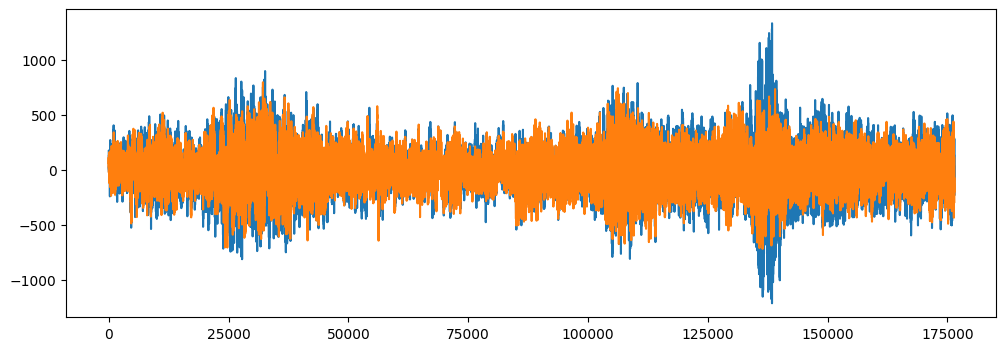

In [8]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)

In [19]:
import librosa
import IPython.display as ipd

In [144]:
y, sr = librosa.load('../data/urban/fold1/7383-3-0-0.wav')

In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Class Distribution')

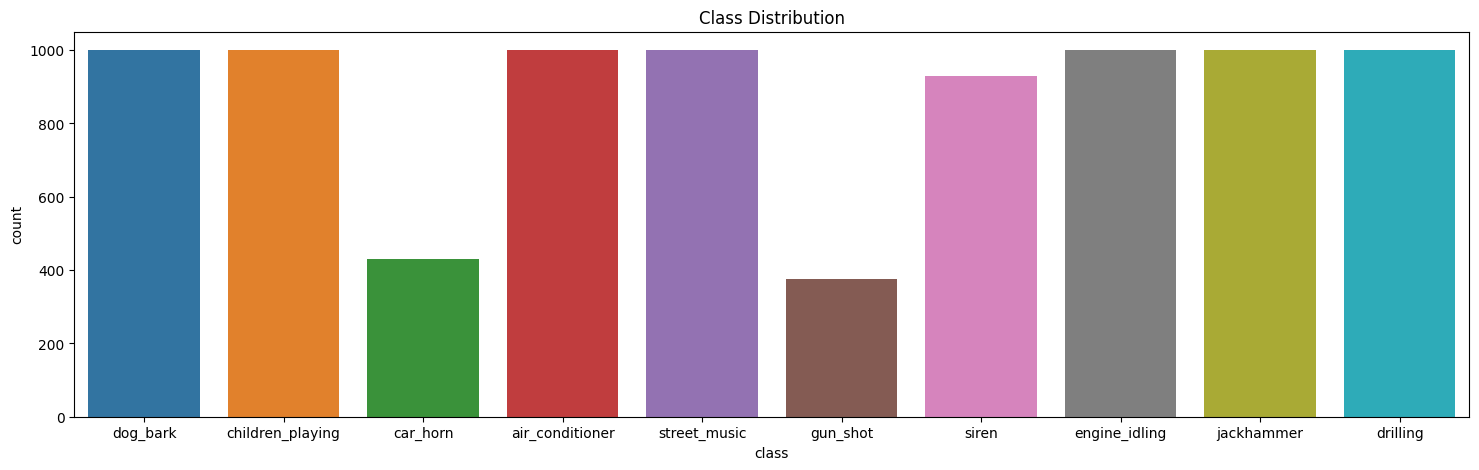

In [13]:
Class = data.value_counts()
f, ax = plt.subplots(figsize=(18,5)) 
ax = sns.countplot(x=data['class'], data=data['class'])
plt.title('Class Distribution')

In [145]:
ipd.Audio(data=y, rate=sr)

In [146]:
y

array([ 3.4924597e-10,  3.4924597e-10,  4.6566129e-10, ...,
       -7.9498515e-03, -7.7366987e-03, -8.0531817e-03], dtype=float32)

In [147]:
sr

22050

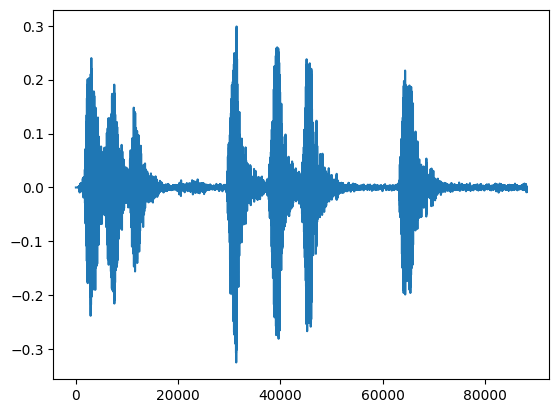

In [16]:
plt.plot(y)

In [57]:
def PolyCoefficients(x, coeffs):
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*(x**i)
    return y

In [167]:
x = np.linspace(0,sr*4,sr*4)

In [92]:
coeffs = np.polyfit(x, y,25)
coeffs = np.flip(coeffs)


c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


# This is a polynomial of order <built-in function ord>.


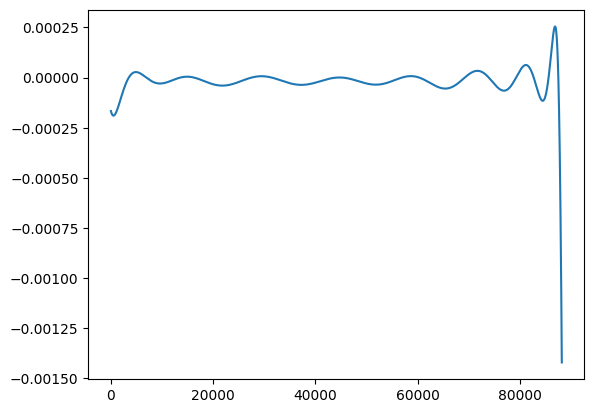

In [93]:

plt.plot(x, PolyCoefficients(x, coeffs))
plt.show()

In [96]:
from scipy import signal

In [116]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'haar']

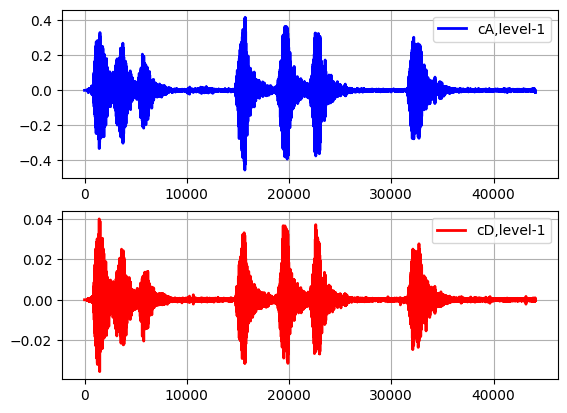

In [123]:
import pywt
from pylab import *
from numpy import *
st='haar'
(cA, cD) = pywt.dwt(y,st)
subplot(2, 1, 1)
plot(cA,'b',linewidth=2, label='cA,level-1')
grid()
legend(loc='best')
subplot(2, 1, 2)
plot(cD,'r',linewidth=2, label='cD,level-1')
grid()
legend(loc='best')
show()

In [124]:
ipd.Audio(data=cA, rate=sr)

In [122]:
ipd.Audio(data=cD, rate=sr)

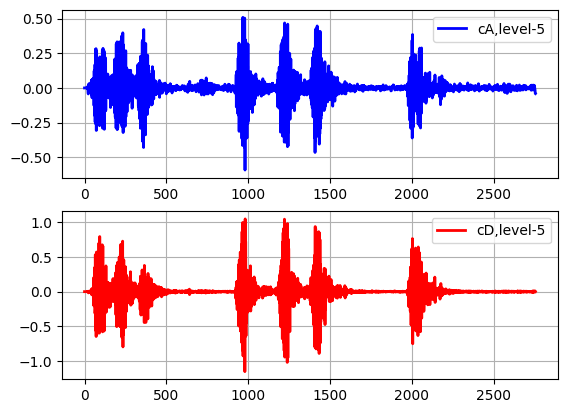

In [125]:
(cA, cD) = pywt.dwt(y,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
(cA, cD) = pywt.dwt(cA,st)
subplot(2, 1, 1)
plot(cA,'b',linewidth=2, label='cA,level-5')
grid()
legend(loc='best')
subplot(2, 1, 2)
plot(cD,'r',linewidth=2, label='cD,level-5')
grid()
legend(loc='best')
show()

In [126]:
ipd.Audio(data=cA, rate=sr)

In [127]:
ipd.Audio(data=cD, rate=sr)

+Шум


In [225]:
noise = np.random.randn(len(y))
data_noise = y + 0.005 * noise
ipd.Audio(data=data_noise, rate=sr)

In [149]:
y_third = librosa.effects.pitch_shift(y =y,sr = sr, n_steps=20)
ipd.Audio(data=y_third, rate=sr)

In [153]:
from pykalman import KalmanFilter

In [230]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

In [231]:
import numpy as np
from pykalman import KalmanFilter

observations = data_noise
x = np.linspace(0,sr*4,sr*4)

filtered_state_estimates = kf.filter(observations)
smoothed_state_estimates = kf.smooth(observations)


In [233]:
filtered_state_estimates

(array([[ 1.20605241e-03,  0.00000000e+00],
        [ 6.75089577e-04, -3.51631014e-04],
        [ 1.11749305e-03,  4.53862316e-05],
        ...,
        [-8.39692454e-03,  1.76369344e-04],
        [-5.20637119e-03,  8.25953444e-04],
        [-2.75517302e-03,  1.17620848e-03]]),
 array([[[0.5       , 0.        ],
         [0.        , 1.        ]],
 
        [[0.60159363, 0.39840637],
         [0.39840637, 0.61159363]],
 
        [[0.66887417, 0.33443709],
         [0.33443709, 0.28381217]],
 
        ...,
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]],
 
        [[0.36868629, 0.07945525],
         [0.07945525, 0.04640175]]]))

In [218]:
filtered_state_estimates

array([[ 1.74622983e-10,  0.00000000e+00],
       [ 2.79675056e-10,  6.95709095e-11],
       [ 4.27113167e-10,  1.08504510e-10],
       ...,
       [-7.31291365e-03, -1.68588262e-04],
       [-7.57558948e-03, -1.88864989e-04],
       [-7.87090424e-03, -2.11805883e-04]])

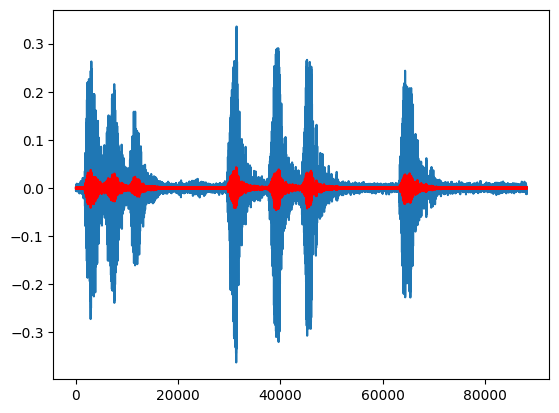

In [236]:

plt.plot(x,filtered_state_estimates[0][:,0])
plt.plot(x,filtered_state_estimates[0][:,1],c = 'r')

In [238]:
ipd.Audio(data=filtered_state_estimates[0][:,1], rate=sr)

In [241]:
ipd.Audio(data=smoothed_state_estimates[0][:,1], rate=sr)

In [279]:
from scipy import signal
 
b, a = signal.butter(5, 0.1, 'lowpass')   
filtedData = signal.filtfilt(b, a, y)

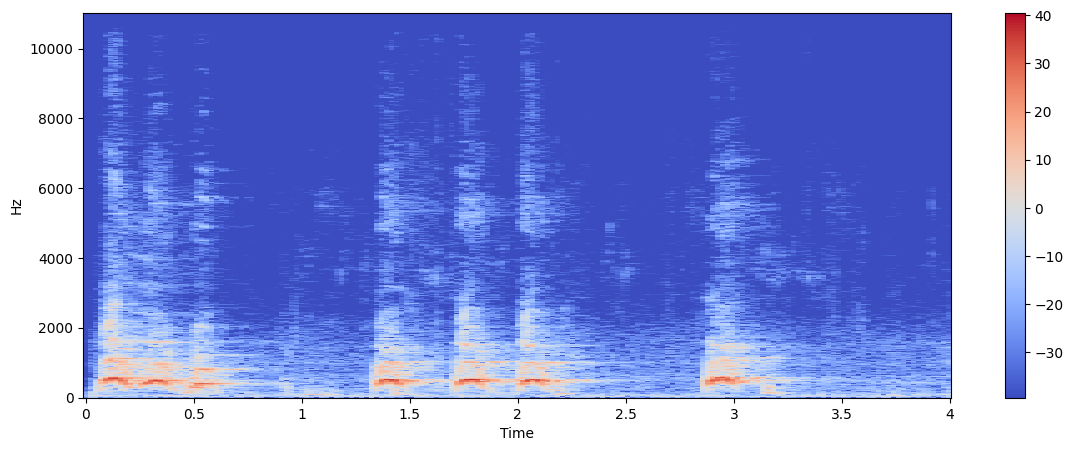

In [275]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

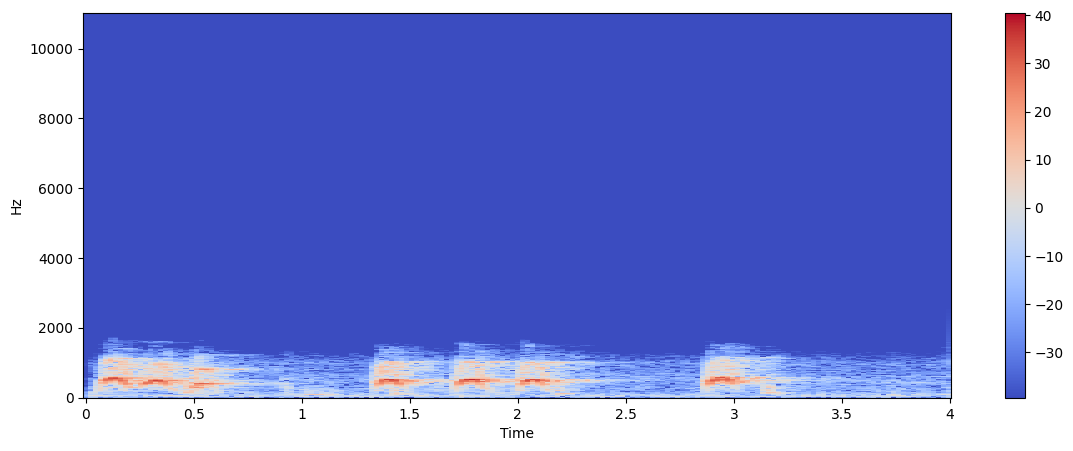

In [280]:
X = librosa.stft(filtedData)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [281]:
ipd.Audio(data=filtedData, rate=sr)

In [283]:
b, a = signal.butter(8, 0.2, 'highpass')   
filtedData2 = signal.filtfilt(b, a, y)

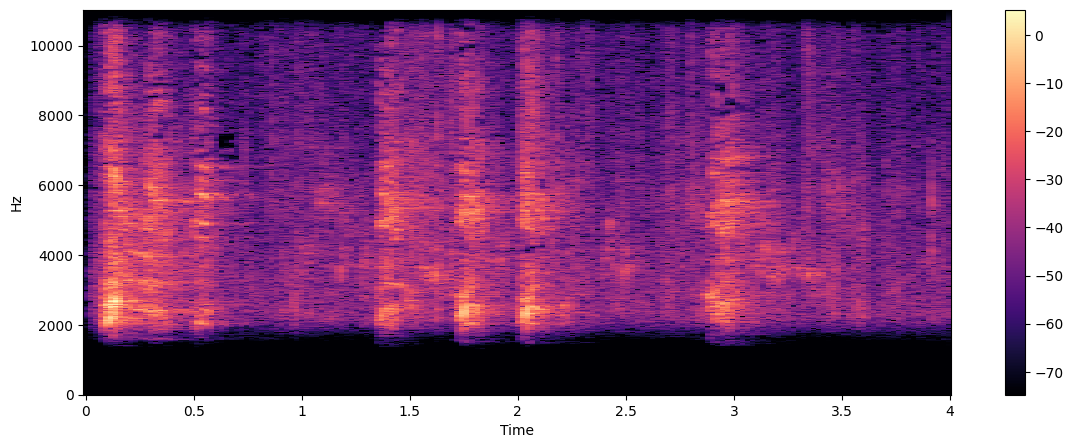

In [284]:
X = librosa.stft(filtedData2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [285]:
ipd.Audio(data=filtedData2, rate=sr)

In [290]:
from scipy import signal
 
b, a = signal.butter(8, [0.1,0.6], 'bandpass')  
filtedData3 = signal.filtfilt(b, a,y)

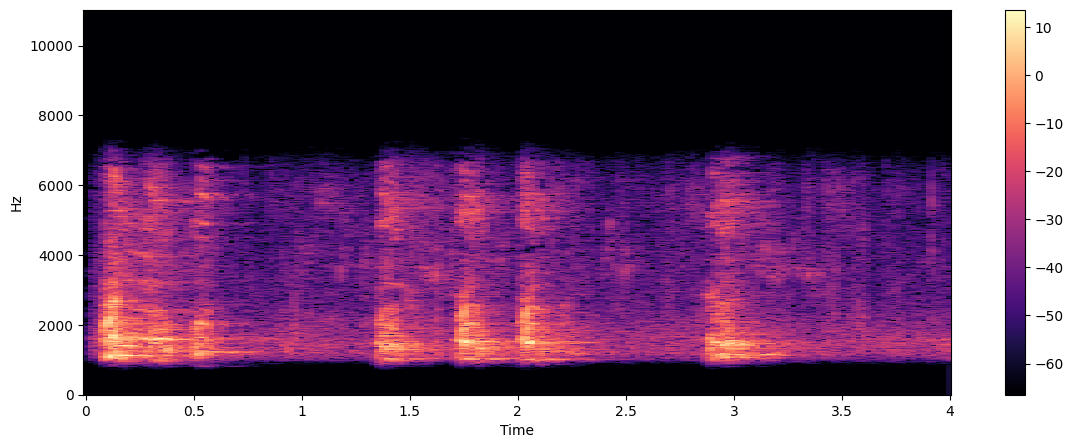

In [291]:
X = librosa.stft(filtedData3)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [292]:
ipd.Audio(data=filtedData3, rate=sr)

In [295]:
b, a = signal.butter(8, [0.2,0.8], 'bandstop')   
filtedData4 = signal.filtfilt(b, a, y) 

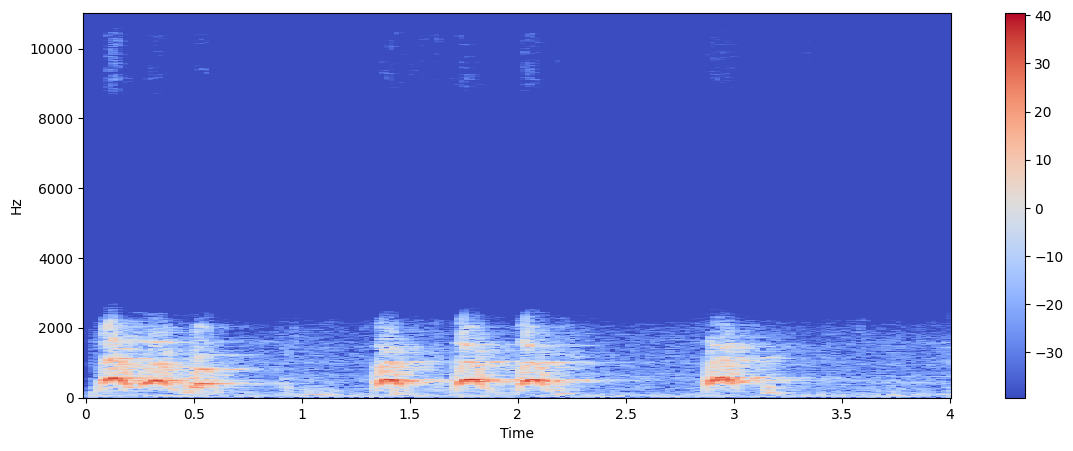

In [296]:
X = librosa.stft(filtedData4)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [297]:
ipd.Audio(data=filtedData4, rate=sr)

In [316]:
from pathlib import Path

In [317]:
def create_melspec(filename,name,dirr):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=2.97)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate,n_fft=2048, hop_length=512)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('../data/melspec/' + dirr +'/' +name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [301]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [310]:
data.values

array([['100032-3-0-0.wav', 100032, 0.0, ..., 5, 3, 'dog_bark'],
       ['100263-2-0-117.wav', 100263, 58.5, ..., 5, 2,
        'children_playing'],
       ['100263-2-0-121.wav', 100263, 60.5, ..., 5, 2,
        'children_playing'],
       ...,
       ['99812-1-4-0.wav', 99812, 242.691902, ..., 7, 1, 'car_horn'],
       ['99812-1-5-0.wav', 99812, 253.20985, ..., 7, 1, 'car_horn'],
       ['99812-1-6-0.wav', 99812, 332.289233, ..., 7, 1, 'car_horn']],
      dtype=object)

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [322]:
root_path = '../data/melspec/'
  
list = data['class'].unique()
  
for items in list:
    path = os.path.join(root_path, items)
    os.mkdir(path)

In [323]:
for i in data.values:
    filename = '../data/urban/fold' + str(i[5]) + '/' + str(i[0])
    name = str(i[1])
    dirr = str(i[-1])
    create_melspec(filename,name,dirr)
    


c:\Users\malya\Desktop\kernelModeling\KernelModelingONIIP\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
